# I- Data Pre-processing
Exploration and cleaning of the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

In [2]:
Quora_data = pd.read_csv("train.csv")

In [3]:
Quora_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
qid              1306122 non-null object
question_text    1306122 non-null object
target           1306122 non-null int64
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


In [4]:
Quora_data.isnull().sum()

qid              0
question_text    0
target           0
dtype: int64

In [5]:
Quora_data.head(4)

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BDF4D30>]],
      dtype=object)

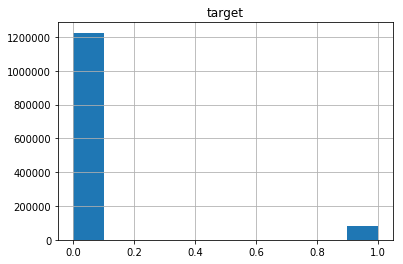

In [6]:
Quora_data.hist(bins=10)

In [7]:
Quora_data["target"].value_counts()

0    1225312
1      80810
Name: target, dtype: int64

## I-1 Data Sample and Creating a banlanced sample

In [8]:
sincireData = Quora_data[Quora_data.target==0].sample(n=Quora_data[Quora_data.target==1].shape[0],random_state=42)
sincireData.shape

(80810, 3)

In [9]:
balancedData = [sincireData,Quora_data[Quora_data.target==1]]
balancedData = pd.concat(balancedData)

balancedData.shape[0]

161620

In [10]:
balancedData = balancedData.sample(n=balancedData.shape[0])
Data = balancedData.sample(frac=0.05,random_state=10)
Data

,qid,question_text,target
1055564,ced8faf390b5e162a29d,Why might a guy read messages but not respond?...,1
1246632,f44e765b132d778e5fd5,Is Pro Tools HD for beginners?,0
346483,43e0d35ad43882cf68a5,Do you think someone can be an atheist and hav...,1
1079234,d37f134e3f035cab2cc5,"I know white men can't jump, but is it true th...",1
1154096,e2220d9a18e40043f542,What are some of Jayne Posner's major accompli...,0
524948,66c47081b727e8e5f5bf,For undergrad transfer applicants to the Unive...,0
1202768,ebba4dd1212fa8ee5b0e,Pakistani Muslim girls go for study do not wea...,1
1158763,e30c5e44d35cacdf914f,"What is Planet X, and what is the size of it?",1
279279,36a9f0614b5b5c6f8d51,How does Victoria Weaver feel about Ayn Rand?,0
1195303,ea45ac3ad0cafd7aab40,Do some women hate men? I am just feeling rath...,1


In [20]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(Data,test_size=0.2,random_state=21)

## I-2 Tokonizing and Cleanning the data

In [21]:
#!pip install spacy
#!python -m spacy download en_core_web_sm

In [22]:
import nltk
import spacy
import en_core_web_sm
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import string


In [23]:
# Loading the English Tokenizer
en_nlp = spacy.load("en_core_web_sm")
# Parser load the Parser
parser = English()
#list of Stop word
stop_word = spacy.lang.en.stop_words.STOP_WORDS
#List of Ponctuation marks
punctuations = string.punctuation

def spacy_tokenizer(question):
    tokens = parser(question)
    
    #lemmanizing each token and converting to lowercase
    tokens = [word.lemma_.lower().strip() if(word.lemma_!="-PRON-") else word.lower_ for word in tokens]
    #for word in tonkens:
    #    if(word.lemma_ != "-PRON-"):
    #        lemmawords.append(word.lemma_.lower().strip())
    #    else:
    #        lemmawords.append(word.lower_)
    #tokens = lemmawords
    
    #removing StopWord and Punctuation with a filter (on-line-code)
    tokens =[word for word in tokens if word not in stop_word and word not in punctuations  ]
    
    #list of token
    return tokens

In [24]:


LemmaVetor = CountVectorizer(tokenizer=spacy_tokenizer)

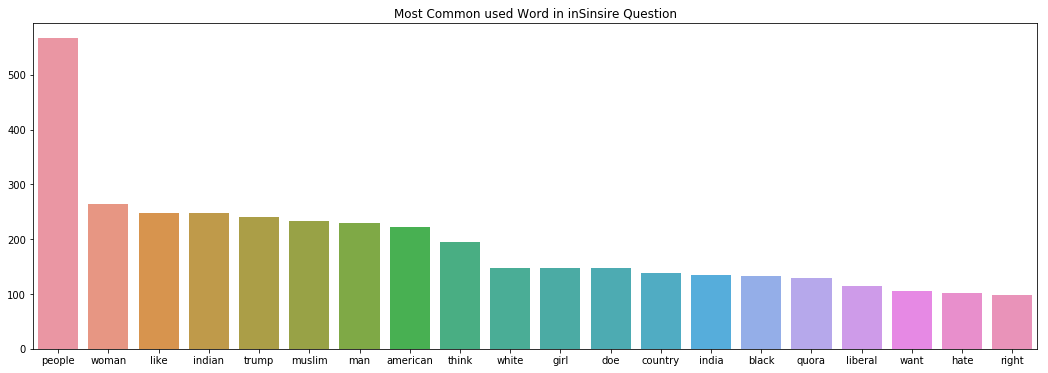

In [25]:
IncesireQuest = [quest for quest in train[train.target==1]["question_text"] ]
IncesireQuest = spacy_tokenizer(" ".join(IncesireQuest))

incensire_counter = Counter(IncesireQuest)

incesire_Word = [word[0] for word in incensire_counter.most_common(20)]
incesire_number = [word[1] for word in incensire_counter.most_common(20)]


fig = plt.figure(figsize=(18,6))
snb.barplot(x=incesire_Word,y=incesire_number)
plt.title("Most Common used Word in inSinsire Question")
plt.show()

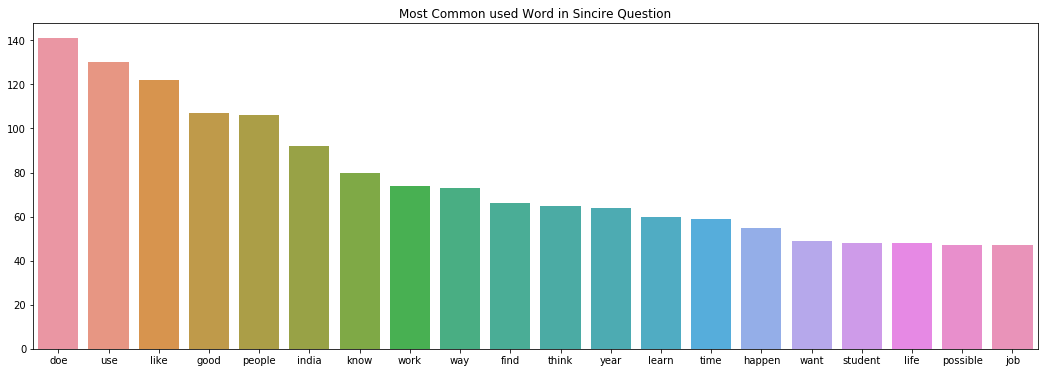

In [26]:
sincereQuest = [quest for quest in train[train.target==0]["question_text"] ]
sincereQuest = spacy_tokenizer(" ".join(sincereQuest))
sincere_counter = Counter(sincereQuest)

sincere_Word = [word[0] for word in sincere_counter.most_common(20)]
sincere_number = [word[1] for word in sincere_counter.most_common(20)]

fig = plt.figure(figsize=(18,6))
snb.barplot(x=sincere_Word,y=sincere_number)
plt.title("Most Common used Word in Sincire Question")
plt.show()

In [ ]:
#!pip install --upgrade "ibm-watson>=3.0.3"

In [ ]:
from ibm_watson import ToneAnalyzerV3
import json
tone_analyzer = ToneAnalyzerV3(
    version='2017-09-21',
    iam_apikey='clZmOMxvCfTb-fR_XntNaDsHKFwMv3LHz4cxmrGCLZV-',
    url='https://gateway-fra.watsonplatform.net/tone-analyzer/api'
)

# function to analyse each question
def get_ton(text):
    ton_result = "undefined"
    ton_analysis = tone_analyzer.tone(tone_input=text,content_type="text/plain").get_result()
    score = 0
    for t in ton_analysis['document_tone']['tones']:
        # taking the ton with the best score
        if(t['score'] > score):
            ton_result = str(t['tone_name'])
    return ton_result


In [16]:
X_ton1 = [get_ton(x) for x in train.iloc[:1000,:]["question_text"]]
X_ton1

ApiException: Error: Unauthorized: Access is denied due to invalid credentials, Code: 401 , X-global-transaction-id: 683fc2df5d1828986c384171

In [17]:
X_ton2 = [get_ton(x) for x in train.iloc[1000:,:]["question_text"]]
X_ton2

ApiException: Error: Unauthorized: Access is denied due to invalid credentials, Code: 401 , X-global-transaction-id: 0e7fa6da5d18289914fc356b

In [32]:
X_ton = [X_ton1,X_ton2]
X_ton = np.concatenate(X_ton)
X_ton.shape

(6464,)

In [167]:
X_ton = pd.DataFrame(X_ton,columns=["ton"])
train.insert(2,"ton",X_ton['ton'].values)
train

,qid,question_text,ton,target
898982,b0233a4229cbe43a4b93,Why does ethnicity cleansing and genocide seem...,Tentative,1
729370,8ed08bb6de33460701f8,How can I meet people into beastiality?,undefined,1
522956,6661454092af7061077e,Can Queen Elizabeth II be tried for treason si...,Tentative,1
826581,a1fdd37683285a918a4e,Is Singapore really the worst dictatorship in ...,Analytical,1
325399,3fc5e1d9ca679be4737e,Can black people get cancer?,Sadness,1
973029,be9ec9af26d71c60290e,How did Bowie manage to collaborate over his l...,Joy,0
1045986,ccf7d8177b7b9121f6fe,Why do my balls sting after I wake up in the m...,Fear,0
1056624,cf0a1f89ec527626b245,Euron Greyjoy wants to see the world burn. Doe...,Analytical,0
738313,90992d71ea1f1fa2b4b4,When will the evangelicals stop pretending the...,Analytical,1
432738,54d08fcab8a44b9d8fae,Why do people point out that I'm depressed all...,Confident,0


In [169]:
train.to_csv("train_s.csv",index=False)

In [34]:
X_test_ton = [get_ton(x) for x in test["question_text"]]

In [36]:
X_test_ton

['Analytical',
 'Tentative',
 'Tentative',
 'Analytical',
 'undefined',
 'undefined',
 'Tentative',
 'Tentative',
 'undefined',
 'Joy',
 'Confident',
 'undefined',
 'Tentative',
 'undefined',
 'Analytical',
 'Tentative',
 'undefined',
 'Tentative',
 'Analytical',
 'Tentative',
 'Confident',
 'undefined',
 'Tentative',
 'Joy',
 'undefined',
 'Tentative',
 'Joy',
 'undefined',
 'Analytical',
 'Analytical',
 'undefined',
 'Analytical',
 'undefined',
 'undefined',
 'Analytical',
 'undefined',
 'Analytical',
 'Tentative',
 'Confident',
 'undefined',
 'Analytical',
 'Analytical',
 'Tentative',
 'Tentative',
 'undefined',
 'Confident',
 'undefined',
 'Analytical',
 'Confident',
 'Tentative',
 'Joy',
 'Tentative',
 'undefined',
 'Sadness',
 'undefined',
 'Confident',
 'Tentative',
 'undefined',
 'undefined',
 'Joy',
 'Analytical',
 'Joy',
 'undefined',
 'Analytical',
 'Tentative',
 'undefined',
 'undefined',
 'undefined',
 'Analytical',
 'undefined',
 'Analytical',
 'Analytical',
 'Analytical'

In [116]:
t = pd.DataFrame([str(x) for x in X_test_ton],columns=["ton"])
t

,ton_name
0,Analytical
1,Tentative
2,Tentative
3,Analytical
4,undefined
5,undefined
6,Tentative
7,Tentative
8,undefined
9,Joy


In [161]:
p = pd.read_csv("ton.csv")
test["ton"]=p["ton_name"].values
test

,qid,question_text,ton,target
193770,25e2d687b72e9fc3f6eb,Why do people complain about women being raped...,Analytical,1
120477,1795b1019206619c55d7,"As a foreigner living in Egypt, what did you f...",Tentative,0
1047802,cd512d2554f7e6deef88,How does playing FIFA while being stoned feel?,Tentative,1
113287,162998c0b8cb0882cd3e,How gorkhaland issue can be resolved now as ar...,Analytical,0
369454,48712960ded9bada4000,Do all US movies involves in certain kissing o...,undefined,1
214979,2a0c9a40beae8acb9c3f,What is the usage of maxima and minima in trig...,undefined,0
1111032,d9b4b8d2ca00ad3f245c,"Who treats their families better and humbler, ...",Tentative,1
406399,4fa1e8e09e6b52e16f82,Do people realize that no one cares if even di...,Tentative,1
815714,9fd6c5f508685a468466,How much should I score to get a rank about 15...,undefined,0
38951,079ef9f077d3a53d4b96,Can you create a story about a time traveling ...,Joy,0


In [170]:
test.to_csv("test_s.csv",index=False)

In [164]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1617 entries, 193770 to 1086616
Data columns (total 4 columns):
qid              1617 non-null object
question_text    1617 non-null object
ton              1617 non-null object
target           1617 non-null int64
dtypes: int64(1), object(3)
memory usage: 143.2+ KB


In [140]:
t.to_csv("ton.csv",index=False)

In [37]:
#reload data
train = pd.read_csv("train_s.csv")
test = pd.read_csv("test_s.csv")

In [38]:
X_train = train['question_text']
Y_train = train["target"]

X_test = test['question_text']
y_test = test['target']

In [39]:
train['ton']

0        Tentative
1        undefined
2        Tentative
3       Analytical
4          Sadness
5              Joy
6             Fear
7       Analytical
8       Analytical
9        Confident
10      Analytical
11       Confident
12       Confident
13       undefined
14           Anger
15       undefined
16       undefined
17       undefined
18       Tentative
19         Sadness
20       Tentative
21       undefined
22             Joy
23       Tentative
24       Tentative
25       undefined
26       Tentative
27       Tentative
28       undefined
29       Tentative
           ...    
6434    Analytical
6435           Joy
6436     undefined
6437    Analytical
6438     Tentative
6439     undefined
6440    Analytical
6441    Analytical
6442    Analytical
6443         Anger
6444     undefined
6445     undefined
6446     Tentative
6447    Analytical
6448           Joy
6449         Anger
6450     undefined
6451     Tentative
6452     Tentative
6453           Joy
6454       Sadness
6455    Anal

# Building the first Model

### a) training model without the Ton analyser

In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([("vectorizer",LemmaVetor),("classifier",classifier)])

param_grid = {'vectorizer__ngram_range':[(1,1),(1,2),(1,3)],
              "classifier__C":[0.001,0.01,10,100,1000]
             }
grid = GridSearchCV(pipe,param_grid=param_grid,cv=5)

In [22]:
grid.fit(X_train,Y_train)
print("Best cross-vaidation accuracy : {:.2f}".format(grid.best_score_))
print("Best Parameter : {}".format(grid.best_params_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))

C:\Users\Arnold\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best cross-vaidation accuracy : 0.83
Best Parameter : {'classifier__C': 10, 'vectorizer__ngram_range': (1, 3)}
Test set score: 0.84


## b) With the Ton Anlyser

In [ ]:
def get_quesTon(X,istrain=True):
    if(istrain):
        return np.array(X_train[X_train['question_text']==t]["ton"] for t in X ).reshape(-1, 1)
    

In [ ]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer

Pipe_with_ton = Pipeline([
    ("feature",FeatureUnion([
        ("question",Pipeline([
            ("vectorizer",LemmaVetor)
        ]),
        ("ton",Pipeline([(
            "tonanalyse",FunctionTransformer()
        )]))
    ])),
    ("classifier",classifier)
    
])